<a href="https://colab.research.google.com/github/melparc30/Machine-Learning/blob/master/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression

**Introduction** <br/>
In this project, we will manually apply the **Linear Regression Algorithm** on our selected dataset **without using any built-in functions or classes**. The goal is to understand how linear regression works to **predict real estate prices** based on a single feature.


**What is Linear Regression?** <br/>
**Linear Regression** is a **supervised machine learning algorithm** used to model the relationship between a **dependent variable (target)** and one or more **independent variables (features)** by fitting a straight line to the observed data.  

In **simple linear regression** (one feature), the relationship between the input \( x \) and output \( y \) is expressed as:
\
y = m x + b


Where:  
- y: Predicted value (target variable)  
- x: Input value (feature variable)  
- m: Slope of the line (how much *y* changes when *x* changes)  
- b: Intercept (value of *y* when *x = 0*)

The main goal of the algorithm is to find the best values of **m** and **b** that minimize the difference between the predicted values and the actual data points.


**Algorithm Steps** <br/>
The steps to implement Linear Regression manually are as follows:

1. **Split the dataset** into:
   - **80% for training**: used to build the model  
   - **20% for testing**: used to evaluate the model’s performance  

2. **Compute the mean** of both **x** and  **y**.

3. **Calculate the slope m** using the formula:  
   \
   m = Σ((x_i - mean(x)) * (y_i - mean(y))) / Σ((x_i - mean(x))^2)
   

4. **Calculate the intercept b** using:
  b = mean(y) - m * mean(x)

5. **Form the regression line equation:**  
   y_pred = m * x + b

6. **Compute the total error (Mean Squared Error, MSE):**  
   MSE = (1/n) * Σ((y_pred - y_actual)^2)
   This measures how far the predicted values are from the actual values.

7. **Visualize the result** by plotting the original data points and the best-fit regression line.

**Dataset Description**
The dataset used in this project was downloaded from **Kaggle**.  
It contains **four features** (three independent variables and one dependent variable.)
Since this dataset represents real estate data, we aim to **predict the price of a property** based on one selected feature.

| Feature | Description |
|----------|--------------|
| **m2** | Area of the real estate in square meters |
| **distance_meter** | Distance of the real estate from the city center (in meters) |
| **year** | Age of the real estate |
| **price** | Price of the real estate (target variable) |

For this project, we will select **one base feature** `m2` as the **independent variable (x-axis)** and `price` as the **dependent variable (y-axis)** to perform the linear regression analysis.

In [208]:
# import libraries for data preprocessing and visual
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Data Loading

In [209]:
# Load dataset from GDrive
data = pd.read_csv('/content/drive/MyDrive/COMPUTATIONAL SCIENCE/Ass3-LinearRegression/real_estate.csv')
data

,m2,distance_center,year,price
0,129,1,13,8092000
1,75,1,28,1630000
2,106,14,13,6038000
3,101,4,13,5848000
4,117,11,23,5456000
...,...,...,...,...
2012,131,9,14,7938000
2013,149,9,11,9792000
2014,121,1,0,9418000
2015,87,5,23,3236000


## Data Preprocessing

In [210]:
# check for nulls
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   m2               2017 non-null   int64
 1   distance_center  2017 non-null   int64
 2   year             2017 non-null   int64
 3   price            2017 non-null   int64
dtypes: int64(4)
memory usage: 63.2 KB


In [211]:
# Check for duplicates
duplicates = data.duplicated()
duplicates.value_counts()

,count
False,1985
True,32


In [212]:
# Since there are 32 duplicates, drop them
data = data.drop_duplicates()

data

,m2,distance_center,year,price
0,129,1,13,8092000
1,75,1,28,1630000
2,106,14,13,6038000
3,101,4,13,5848000
4,117,11,23,5456000
...,...,...,...,...
2011,84,6,13,4482000
2012,131,9,14,7938000
2013,149,9,11,9792000
2015,87,5,23,3236000


In [213]:
# Check the statistical information
data.describe()

,m2,distance_center,year,price
count,1985.000000,1985.000000,1985.000000,1.985000e+03
mean,108.417632,7.445340,15.045340,6.076806e+06
std,25.218788,4.552578,8.969705,2.381359e+06
min,65.000000,0.000000,0.000000,4.260000e+05
25%,86.000000,4.000000,7.000000,4.330000e+06
50%,110.000000,7.000000,15.000000,6.068000e+06
75%,130.000000,11.000000,23.000000,7.858000e+06
max,150.000000,15.000000,30.000000,1.245880e+07


We are already finished with out data cleaning, let's proceed to our model training. But first, let's separate our training and testing dataset and only use one independent variable `m2`



## Data Splitting

In [214]:
X = data[['m2']]
y = data['price']

In [215]:
# Since the real estate prices are skewed, I will apply logarithmic to stabilize its variance
y = np.log(y)

In [216]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [217]:
# Scale m2 to ensure that the values are in a similar scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [218]:
# Print the shape of the training and testing dataset
print('X Train Dataset', X_train_scaled.shape)
print('X Test Dataset', X_test_scaled.shape)

X Train Dataset (1588, 1)
X Test Dataset (397, 1)


Now, our dataset is ready. Let's proceed to creating our Linear Regression model.

## Model Architecture

In [219]:
class LinearRegression:
    # An implementation of Linear Regression using Gradient Descent.
    def __init__(self, learning_rate, num_iters):

        # Initialize the LinearRegression model.
        self.learning_rate = learning_rate  # step size for updating parameters
        self.num_iters = num_iters          # number of times to update parameters
        self.m = None                       # slopes for each feature
        self.b = None                       # intercept

    def fit(self, X, y):

        # Train the Linear Regression model using gradient descent.
        m = X.shape[1]                      # Number of features
        self.m = np.zeros(m)                # Initialize slopes to zero
        self.b = 0                          # Initialize bias to zero

        # Loop for the Gradient Descent
        for i in range(self.num_iters):
            # Compute the predicted values using current slopes and intercept
            y_pred = np.dot(X, self.m) + self.b

            # Compute gradients with respect to slopes and intercept
            # Dividing by n gives the average gradient
            grad_slope = (1 / X.shape[0]) * np.dot(X.T, (y_pred - y))  # Gradient for slopes: computes the sum of (error * feature_value) for each feature
            # Dividing by n gives the average error
            grad_inter = (1 / X.shape[0]) * np.sum(y_pred - y)         # Gradient for intercept: adds all errors

            # Update slopes and intercept by moving against the gradient
            self.m -= self.learning_rate * grad_slope
            self.b -= self.learning_rate * grad_inter

    def predict(self, X):

        # Predict target values for given input features.
        y_pred = np.dot(X, self.m) + self.b   # Linear combination of features and weights
        return y_pred                         # Predicted values of shape (n_samples,)

    def mse(self, y_pred, y):
        # Compute Mean Squared Error (MSE) between predictions and actual values.
        mse_score = np.mean((y_pred - y) ** 2)
        return mse_score

    def rmse(self, y_pred, y):
        # Compute Root Mean Squared Error (RMSE) between predictions and actual values.
        rmse_score = np.sqrt(np.mean((y_pred - y) ** 2))
        return rmse_score

    def r2_score(self, y_pred, y):
        # Compute R-squared (coefficient of determination) metric.
        sum_squares = np.sum((y_pred - y) ** 2)                 # Residual sum of squares
        total_sum_squares = np.sum((y - np.mean(y)) ** 2)       # Total sum of squares
        r2_score = 1 - (sum_squares / total_sum_squares)        # R^2 formula
        return r2_score

## Model Training

In [220]:
# Train the create model with Linear Regression
model = LinearRegression(learning_rate=0.01, num_iters=5000)
model.fit(X_train_scaled, y_train)

In [221]:
# make predictions
y_pred_log = model.predict(X_test_scaled)

# Inverse the log to return to real price scale
y_pred = np.exp(y_pred_log)
y_test_actual = np.exp(y_test)

In [222]:
# check learned parameters
print('Slope (m):', model.m)
print('Intercept (b):', model.b)

Slope (m): [0.37418927]
Intercept (b): 15.52613360815328


In [223]:
# Compute for the loss
mse = model.mse(y_pred, y_test_actual)
print(f'Mean Squared Error (MSE): {mse:.3f}')

# Compute for RMSE
rmse = model.rmse(y_pred, y_test_actual)
print(f'Root Mean Squared Error (RMSE): {rmse:.3f}')

# Compute for R2
r2 = model.r2_score(y_pred, y_test_actual)
print(f'R-squared (R^2): {r2:.3f}')

Mean Squared Error (MSE): 2442743361148.445
Root Mean Squared Error (RMSE): 1562927.817
R-squared (R^2): 0.535


## Data Visualization

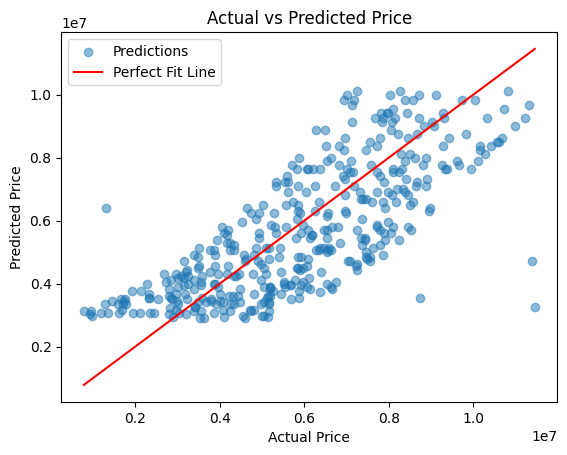

In [224]:
# Plotting
plt.scatter(y_test_actual, y_pred, alpha=0.5, label="Predictions")

# Determine the min and max values for both axes
# This helps us draw a correct diagonal reference line
min_val = min(y_test_actual.min(), y_pred.min())
max_val = max(y_test_actual.max(), y_pred.max())

# Plot the 45-degree "Perfect Fit" line
# If the model were perfect, all points would fall exactly on this line
plt.plot([min_val, max_val], [min_val, max_val], 'r-', label="Perfect Fit Line")

# Label the axes
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")

# Add a title
plt.title("Actual vs Predicted Price")

# Add legend to identify the points and line
plt.legend()

# Display the plot
plt.show()

Our linear regression model was not able to properly predict the prices using only 1 independent variable. Let's test its performance when we use the remaining 2 independent variables if there will be a change.

## Model Retraining

In [225]:
# Assign X and y again
X = data.drop(['price'], axis=1)
y = np.log(data['price'])

In [226]:
# Split Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# print the shape of the new dataset
print('X Train Dataset', X_train.shape)
print('y Test Dataset', y_test.shape)

X Train Dataset (1588, 3)
y Test Dataset (397,)


In [227]:
# Feature scaling
X_train_scaled = scaler.fit_transform(X_train)                  # Fit only on training
X_test_scaled = scaler.transform(X_test)                        # Use same scaler

In [228]:
# train the model we create with the new dataset
model = LinearRegression(learning_rate=0.01, num_iters=5000)
model.fit(X_train_scaled, y_train)

In [229]:
y_pred = model.predict(X_test_scaled)

# Convert back to real price
y_pred = np.exp(y_pred)
y_test_actual = np.exp(y_test)

In [230]:
# check learned parameters
print('Slope (m):', model.m)
print('Intercept (b):', model.b)

Slope (m): [ 0.37955264 -0.01616146 -0.25292394]
Intercept (b): 15.52613360815328


In [231]:
# Check result
mse = model.mse(y_pred, y_test_actual)
print(f'Mean Squared Error (MSE): {mse:.3f}')

rmse = model.rmse(y_pred, y_test_actual)
print(f'Root Mean Squared Error (RMSE): {rmse:.3f}')

r2 = model.r2_score(y_pred, y_test_actual)
print(f'R-squared (R^2): {r2:.3f}')


Mean Squared Error (MSE): 941264226300.572
Root Mean Squared Error (RMSE): 970187.727
R-squared (R^2): 0.821


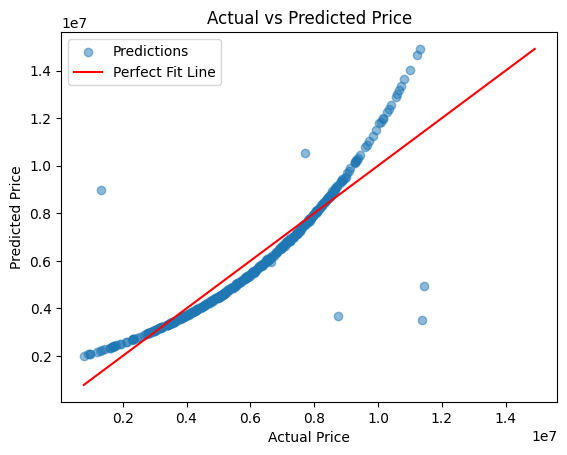

In [232]:
# Plotting
plt.scatter(y_test_actual, y_pred, alpha=0.5, label="Predictions")

# Determine the min and max values for both axes
# This helps us draw a correct diagonal reference line
min_val = min(y_test_actual.min(), y_pred.min())
max_val = max(y_test_actual.max(), y_pred.max())

# Plot the "Perfect Fit" line
# If the model were perfect, all points would fall exactly on this line
plt.plot([min_val, max_val], [min_val, max_val], 'r-', label="Perfect Fit Line")

# Label the axes
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")

# Add a title
plt.title("Actual vs Predicted Price")

# Add legend to identify the points and line
plt.legend()

# Display the plot
plt.show()